In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
intel = pd.read_csv('Intel-Final-Data.csv')
intel

,medhumidity,meanvoltage,cluster
0,35.888716,2.710136,2
1,36.251354,2.678726,2
2,36.603421,2.696685,2
3,37.089357,2.672143,2
4,0.000000,2.669458,1
...,...,...,...
1655,33.304767,1.877793,0
1656,32.020783,2.703037,2
1657,35.386300,2.593648,2
1658,34.915146,2.816561,2


In [3]:
X = intel.drop('cluster',axis=1)
y = intel['cluster']

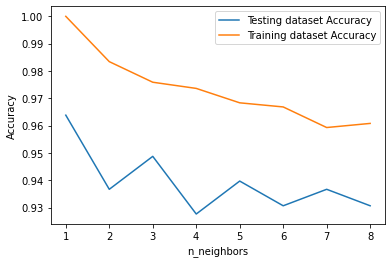

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show()


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_pred = classifier.predict(X_test)

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 65   0   1]
 [  1  64   0]
 [  2   0 199]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       1.00      0.98      0.99        65
           2       0.99      0.99      0.99       201

    accuracy                           0.99       332
   macro avg       0.98      0.99      0.98       332
weighted avg       0.99      0.99      0.99       332

